<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/leaf-classification/blob/main/Mod_8_Leaf_Classification_Part_3_CNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Part 1 Code (Data Prep) - https://colab.research.google.com/drive/1dN0y6HYqIjKFhq7pgYYhlCY2ecmYSoN6?usp=sharing

Part 2 Code (NN DoE) - https://colab.research.google.com/drive/1xpimK1T2i8VQ9clx9Jx69ZKy6m0844Vu?usp=sharing

Part 3 Code (CNN Models) - https://colab.research.google.com/drive/1XCXj9PZTnriaDO9sqpb-PucG1fMslN4B?usp=sharing

Data taken from - https://www.kaggle.com/competitions/leaf-classification/data

### Ready data files

#### Import modules and load data

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
import time
import zipfile
import os
import tensorflow as tf

from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from google.colab import files
from google.colab import drive

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Import images

In [ ]:
# Unzip images.zip
zip_path = "images.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("images")

#### Export labels for each image

In [ ]:
# Read data files
df_train_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [ ]:
df_train_original.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.0

In [ ]:
# Crate df_labels that has "id" and "species" from both df_train and df_test
df_labels = df_train_original[["id", "species"]]
df_labels = pd.concat([df_labels, df_test_original[["id"]]], ignore_index=True)
df_labels = df_labels.sort_values(by="id").reset_index(drop=True)
df_labels.head()

# Add a column called train, when species is NaN train = 0
df_labels["train"] = 1
df_labels.loc[df_labels["species"].isna(), "train"] = 0
df_labels.head()

,id,species,train
0,1,Acer_Opalus,1
1,2,Pterocarya_Stenoptera,1
2,3,Quercus_Hartwissiana,1
3,4,NaN,0
4,5,Tilia_Tomentosa,1


### CNN Models

In [ ]:
# Filter to training data and build image paths

df_train = df_labels[df_labels['train'] == 1].copy()
df_train['file_path'] = df_train['id'].astype(str).apply(lambda x: os.path.join("images", "images", f"{x}.jpg"))

In [ ]:
# Encode species and split data

label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['species'])

class_names = label_encoder.classes_
num_classes = len(class_names)

df_train, df_val = train_test_split(df_train, test_size=0.2, stratify=df_train['label'], random_state=42)


In [ ]:
IMG_SIZE = (96, 96) # started with 128 x 128 but cut down to improve learning speed
BATCH_SIZE = 32

def preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=1) # grayscale not RGB
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0 # normalized to 255, but not sure if that much detail is required
    return image, tf.one_hot(label, num_classes)

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((df_train['file_path'].values, df_train['label'].values))
train_ds = train_ds.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((df_val['file_path'].values, df_val['label'].values))
val_ds = val_ds.map(preprocess_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Training model: 2 conv layers, 32 filters, dropout=0.3


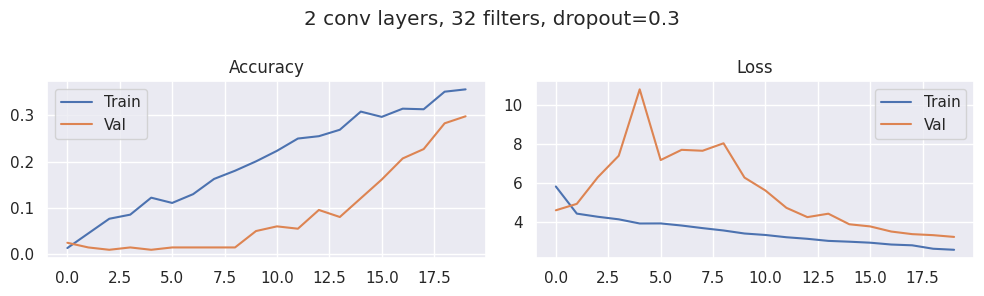

Training model: 2 conv layers, 32 filters, dropout=0.5


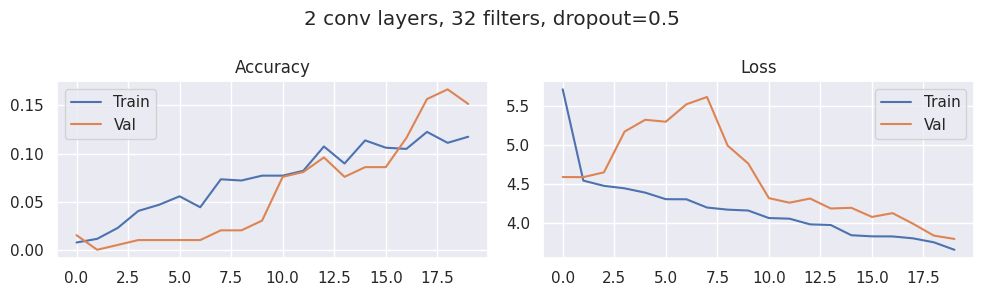

Training model: 2 conv layers, 64 filters, dropout=0.3


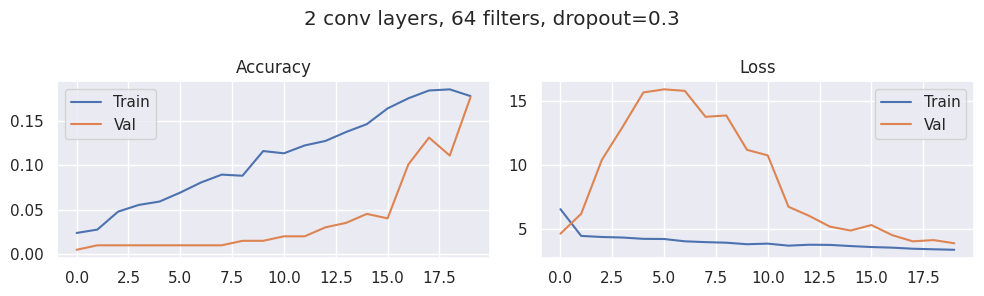

Training model: 2 conv layers, 64 filters, dropout=0.5


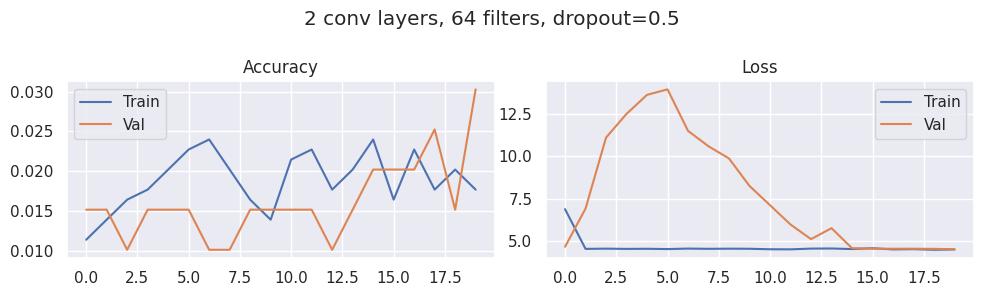

Training model: 3 conv layers, 32 filters, dropout=0.3


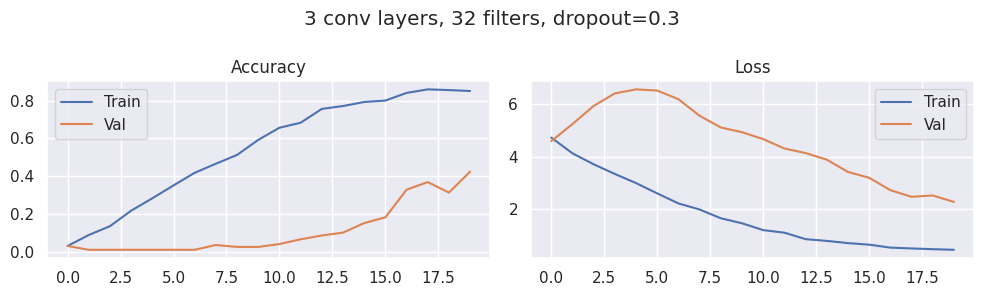

Training model: 3 conv layers, 32 filters, dropout=0.5


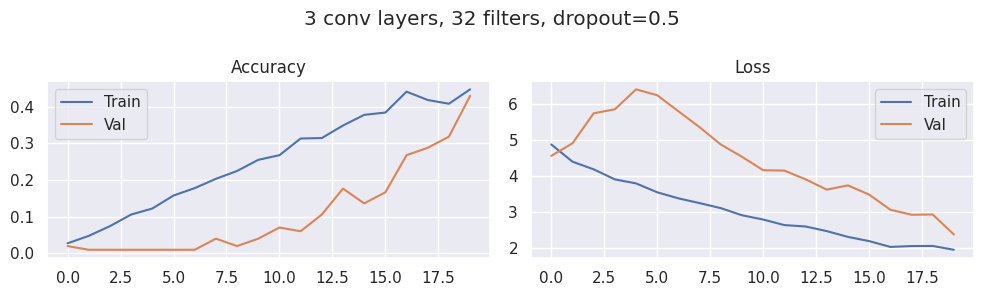

Training model: 3 conv layers, 64 filters, dropout=0.3


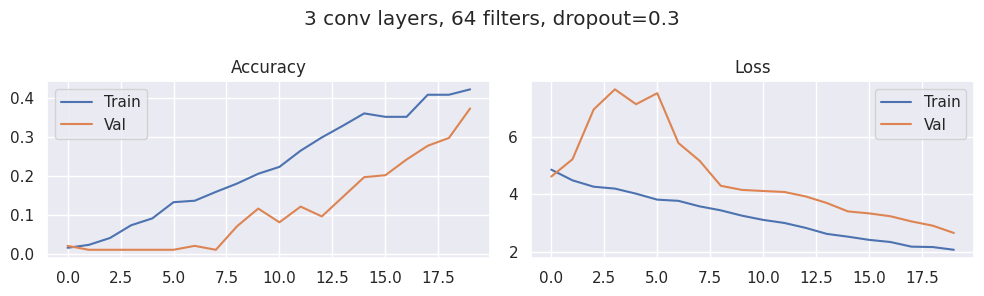

Training model: 3 conv layers, 64 filters, dropout=0.5


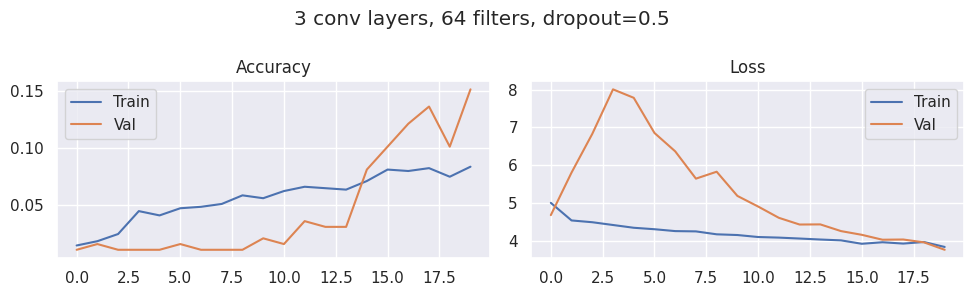

Hyperparameter Tuning Results:
   conv_layers  filters  dropout  train_accuracy  train_loss  val_accuracy  \
0            2       32      0.3          0.3561      2.5515        0.2980   
1            2       32      0.5          0.1174      3.6637        0.1515   
2            2       64      0.3          0.1780      3.3646        0.1768   
3            2       64      0.5          0.0177      4.5147        0.0303   
4            3       32      0.3          0.8510      0.4587        0.4242   
5            3       32      0.5          0.4470      1.9530        0.4293   
6            3       64      0.3          0.4230      2.0821        0.3737   
7            3       64      0.5          0.0833      3.8403        0.1515   

   val_loss  train_time_sec  
0    3.2136          310.14  
1    3.8020          316.53  
2    3.8745          657.10  
3    4.5277          643.14  
4    2.2768          291.72  
5    2.3776          304.89  
6    2.6645          653.33  
7    3.7655          676.7

In [ ]:
# Define hyperparameter grid
conv_layers_list = [2, 3]
filters_list = [32, 64]
dropout_rates = [0.3, 0.5]

results = []
best_val_acc = 0
best_model_path = "best_cnn_model.h5"

for num_conv in conv_layers_list:
    for filters in filters_list:
        for dropout in dropout_rates:
            print(f"Training model: {num_conv} conv layers, {filters} filters, dropout={dropout}")

            # Build model
            model = Sequential()
            model.add(tf.keras.Input(shape=(96, 96, 1)))

            for _ in range(num_conv):
                model.add(Conv2D(filters, (3, 3), activation='relu', padding='same'))
                model.add(BatchNormalization())
                model.add(MaxPooling2D((2, 2)))

            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dropout(dropout))
            model.add(Dense(num_classes, activation='softmax'))

            model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Train with timing
            start_time = time.time()
            history = model.fit(train_ds,
                                validation_data=val_ds,
                                epochs=20,
                                verbose=0)
            end_time = time.time()

            # Evaluate performance
            val_loss, val_acc = model.evaluate(val_ds, verbose=0)
            train_acc = history.history['accuracy'][-1]
            train_loss = history.history['loss'][-1]

            results.append({
                'conv_layers': num_conv,
                'filters': filters,
                'dropout': dropout,
                'train_accuracy': round(train_acc, 4),
                'train_loss': round(train_loss, 4),
                'val_accuracy': round(val_acc, 4),
                'val_loss': round(val_loss, 4),
                'train_time_sec': round(end_time - start_time, 2)
            })

            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                model.save(best_model_path)

            # Plot training curves
            plt.figure(figsize=(10, 3))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Train')
            plt.plot(history.history['val_accuracy'], label='Val')
            plt.title('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Train')
            plt.plot(history.history['val_loss'], label='Val')
            plt.title('Loss')
            plt.legend()

            plt.suptitle(f"{num_conv} conv layers, {filters} filters, dropout={dropout}")
            plt.tight_layout()
            plt.show()

# Summarize all runs
df_results = pd.DataFrame(results)
print("Hyperparameter Tuning Results:")
print(df_results)

# Load best model
best_model = tf.keras.models.load_model(best_model_path)

#### Takeaways

*  Best model performance was validation accuracy of 42%
*  2-layer models consistently performed poorly, need to increase the number of convolution layers, next test should probably be 3, 4 and 5 layers
*  Number of training epochs should be increased and addition of early stopping might be beneficial
* Model can be further generalized by flipping the images or zooming the images



#### Where to pick up:

Start by adding more convolution layers and epochs to get to better training and validation accuracy.
